In [1]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import os

import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import collections

In [2]:
path=os.getcwd()
path=path+'\data'
os.chdir(path)

In [3]:
df_produto= pd.read_csv('products.csv')
df_order = pd.read_csv('order_products__prior.csv')
df_depat = pd.read_csv('departments.csv')
df_pedido= pd.read_csv('orders.csv')
df_aisles =pd.read_csv('aisles.csv')

In [4]:
df_produto.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [5]:
df_pedido.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [6]:
df_depat.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [7]:
df_order.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [8]:
df_aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [9]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


# df_pedido

In [10]:
df_pedido

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


Text(0, 0.5, 'days_since_prior_order (mean)')

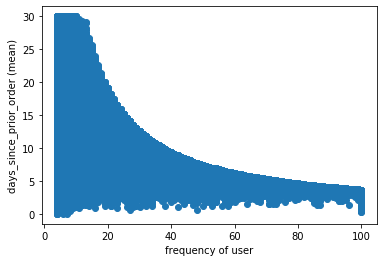

In [11]:
count_user_id=df_pedido.user_id.value_counts()

df_pedido_gb=df_pedido[["user_id","days_since_prior_order"]].groupby(by=["user_id"]).mean()
df_pedido_gb["count"]=count_user_id
df_pedido_gb=df=pd.DataFrame(df_pedido_gb)


plt.scatter(df_pedido_gb["count"],df_pedido_gb["days_since_prior_order"])
plt.xlabel('frequency of user')
plt.ylabel('days_since_prior_order (mean)')

Text(0, 0.5, 'frequency')

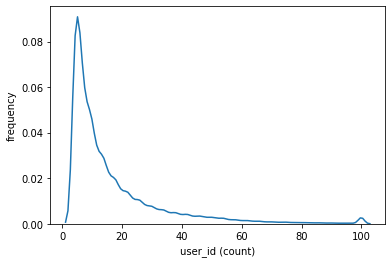

In [12]:
sns.distplot(df_pedido_gb['count'].tolist(), hist=False)
plt.xlabel('user_id (count)')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

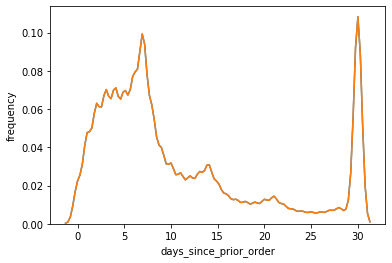

In [13]:
sns.distplot(df_pedido['days_since_prior_order'], hist=False)
plt.xlabel('days_since_prior_order')
plt.ylabel('frequency')

sns.distplot(df_pedido['days_since_prior_order'], hist=False)
plt.xlabel('days_since_prior_order')
plt.ylabel('frequency')

# Juntando datas

Order + Produto

In [14]:
df_order

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [15]:
df_join=pd.merge(df_order,df_produto,  
                 on='product_id', 
                 how='left')


Join + Departamento

In [16]:
df_join=pd.merge(df_join,df_depat ,  
                 on='department_id', 
                 how='left')

Join + Pedido

In [17]:
df_join=pd.merge(df_join,df_pedido ,  
                 on='order_id', 
                 how='left')

# Join

In [18]:
df_join

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,household,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,Banana,24,4,produce,25247,prior,24,2,6,21.0


# Função frequência: freq(x)

x: variável contada

y: variável utilizada para agrupar

eixo: preferência por ordenação

ascending: True ou False

In [19]:
def freq(data,x,y,eixo,ascending):
    data=data[[x,y]].groupby([y]).count()
     
    if eixo=='y':
        data=data.sort_values(x,ascending=ascending)/len(data)*100
        
    if eixo=='x':
        data=data.sort_values(y,ascending=ascending)/len(data)*100
        
    data.plot(kind='bar')
    plt.ylabel('Frequency(%)')

## Compras por departamento

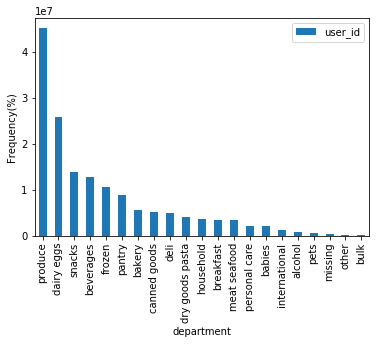

In [20]:
freq(df_join,'user_id','department','y',False)

## Compras por dia da semana

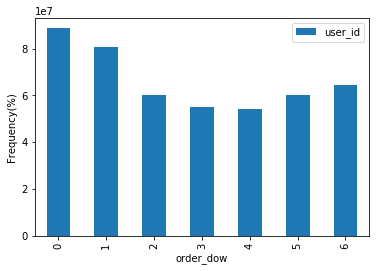

In [21]:
freq(df_join,'user_id','order_dow','x',True)

## Horário das compras

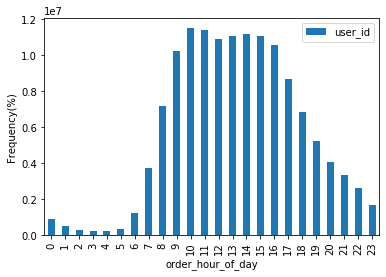

In [22]:
freq(df_join,'user_id','order_hour_of_day','x',True)

## Intervalo entre compras

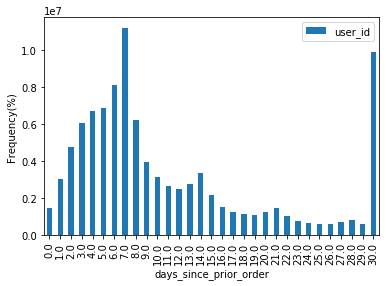

In [23]:
freq(df_join,'user_id','days_since_prior_order','x',True)

# Função (heat_map)

In [24]:
def heat_map(df,x,y,fill):
    data=df[[x,y,fill]].groupby([x,y]).count()

    data=pd.pivot_table(data, values=fill, 
                         index=[x], 
                         columns=[y])
    plt.subplots(figsize=(10,9))
    sns.heatmap(data, norm=LogNorm())

## Compras por dia da semana e departamento

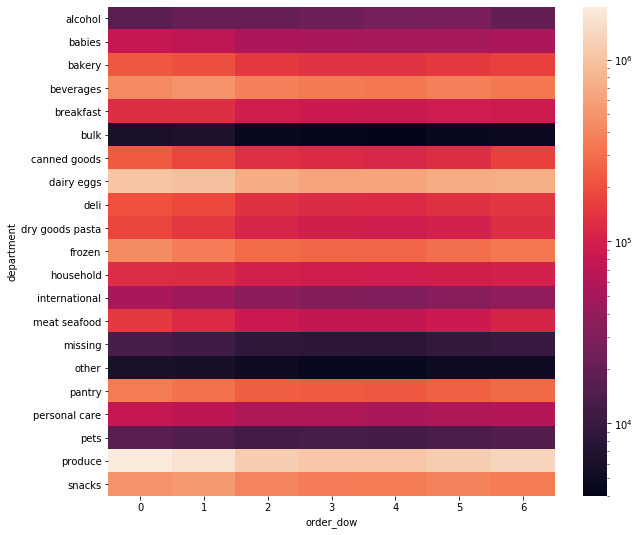

In [25]:
heat_map(df_join,'department','order_dow','order_id')

## Compras por horário e departamento

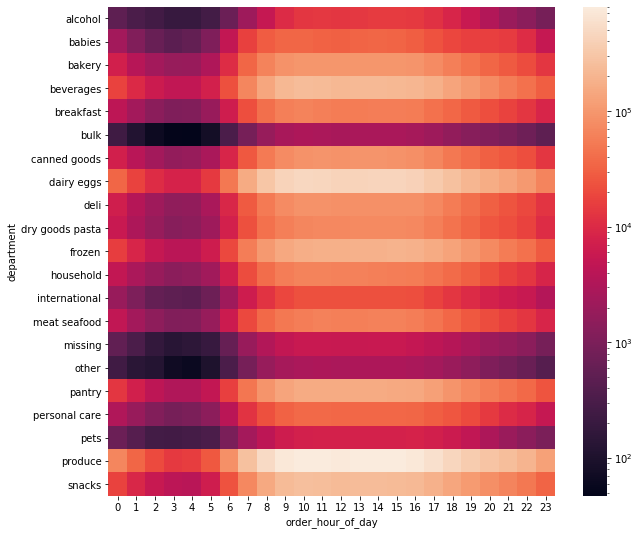

In [26]:
heat_map(df_join,'department','order_hour_of_day','order_id')

## Compras por dia da semana e horário

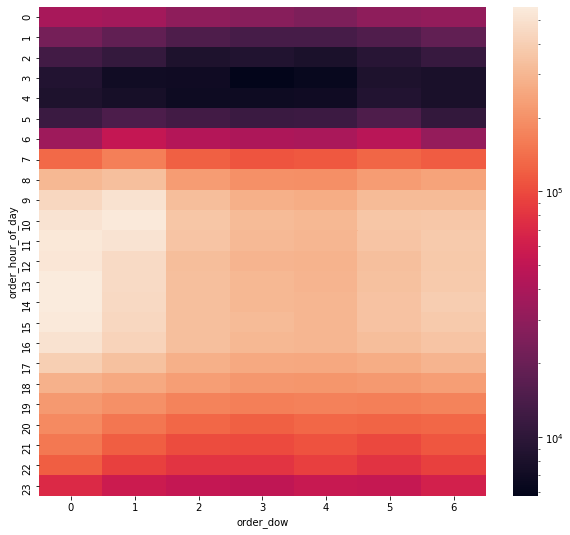

In [27]:
heat_map(df_join,'order_hour_of_day','order_dow','order_id')

# Função box_quantidade(df,dep)

Retorna box plot de quantidade versus dias da última compra em função de departamento (se dep for diferente de 0)

In [28]:
def box_quantidade(df,dep):
    x='user_id'
    y='order_id'
    w='days_since_prior_order'
    
    if dep != 0:
        df=df[df.department==dep]
        
    aux=df[[x,y,w,'eval_set']].groupby([x,y,'days_since_prior_order']).count()
    
    days_since_prior_order=aux.index.get_level_values(2)
    quantidade=aux['eval_set']

    days_qtd=pd.DataFrame([days_since_prior_order,quantidade])

    days_qtd=days_qtd.T
    days_qtd.columns = ['days_since_prior_order','quantidade']

    days_qtd=days_qtd.sort_values(by=['days_since_prior_order'])
    
    plt.figure(figsize=(15,16))
    sns.boxplot(x='days_since_prior_order', color="black",
    y='quantidade', data=days_qtd,showfliers = False).set_title(dep)

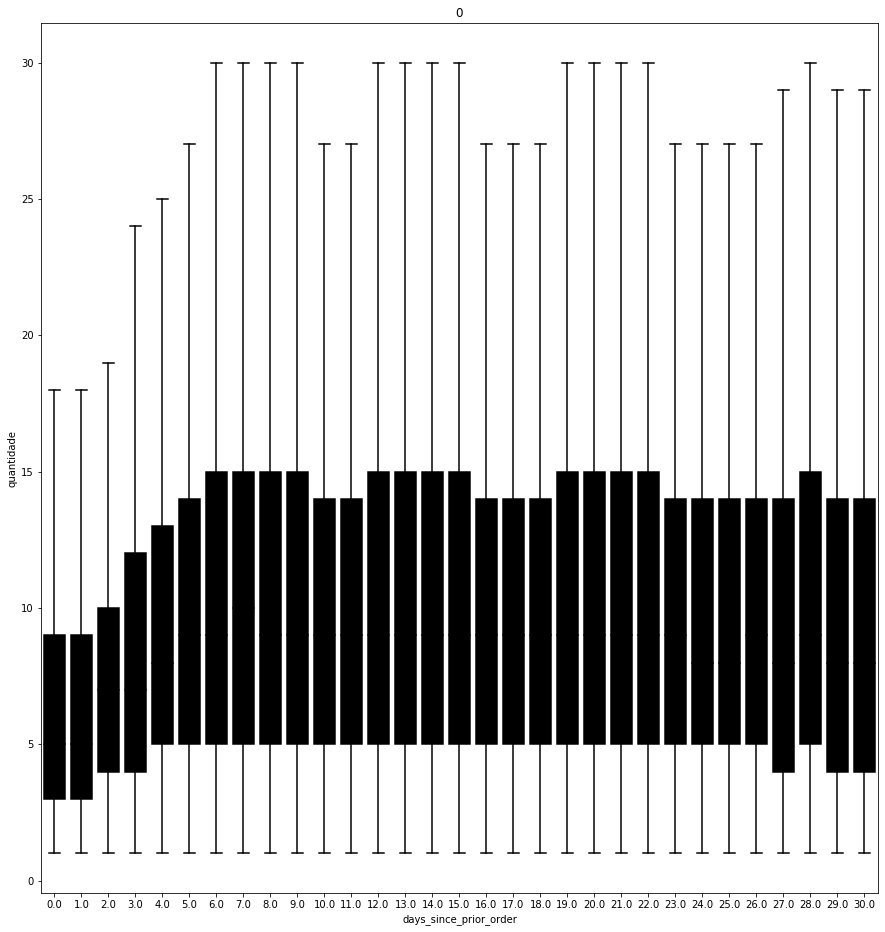

In [29]:
box_quantidade(df_join,0)